In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import torch
from nnsight import LanguageModel
from activation_utils import load_model
from transformers import AutoModelForCausalLM, AutoTokenizer
import json
from typing import Dict, Any, List

torch.set_grad_enabled(False)

In [11]:
# Example usage
from dataset_utils import generate_dataset, process_dataset, print_processed_example
from generation import filter_correct
from tqdm import tqdm

num_samples = 100
total_length = 100
random_offset = True

baseline_accuracies = {}
model_ids = [
    # "meta-llama/Llama-3.2-1B",
    "google/gemma-2-2b",
    # "google/gemma-2-9b",
    # 'meta-llama/Llama-3.1-8B'
]

template_name = "country"
base_entity_name = "first_names1"
base_attribute_name = "country"


for model_id in model_ids:
    baseline_accuracies[model_id] = {}
    model = load_model(model_id)
    model.tokenizer.pad_token = model.tokenizer.eos_token
    for base_question_order in range(5):
        baseline_accuracies[model_id][base_question_order] = []
        for _ in tqdm(range(10)):

            # Generate dataset
            base_dataset = generate_dataset(
                num_samples=num_samples,
                selected_entity_categories=[base_entity_name],
                selected_attribute_categories=[base_attribute_name],
                sample_entities_randomly=True,
                sample_attributes_randomly=True,
                question_order=base_question_order,
                selected_template_categories=[template_name],
                templates_file="data/templates_box.json",
                raw_dataset_path=None,
            )

            # print(base_dataset[0]['text'])
            # break

            # Process and tokenize dataset
            base_dataset = process_dataset(
                base_dataset,
                model.tokenizer,
                ctx_length_with_pad=total_length,
                random_offset=random_offset,
                save_path=None,
            )

            print_processed_example(base_dataset[0], model.tokenizer)

            _, base_accuracy = filter_correct(model, base_dataset)
            print(f"Base accuracy: {base_accuracy:.2f}")
            baseline_accuracies[model_id][base_question_order].append(base_accuracy)

  0%|          | 0/10 [00:00<?, ?it/s]

Original text: Person Elijah is from Bolivia, person Joshua is from Hungary, person Isaac is from Georgia, person Owen is from Denmark, and person William is from Ghana. Bolivia is the home country of Person
key_to_word: {'e0': 'Elijah', 'e1': 'Joshua', 'e2': 'Isaac', 'e3': 'Owen', 'e4': 'William', 'a0': 'Bolivia', 'a1': 'Hungary', 'a2': 'Georgia', 'a3': 'Denmark', 'a4': 'Ghana', 'a_question': 'Bolivia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Elijah <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Bolivia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Joshua <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Hungary <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Isaac <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Georgia <-- a2
Position 18: ,
Positio

 10%|█         | 1/10 [00:03<00:33,  3.69s/it]

Base accuracy: 1.00
Original text: Person Cameron is from Denmark, person Alexander is from Israel, person Evan is from Hungary, person James is from Angola, and person Caleb is from Honduras. Denmark is the home country of Person
key_to_word: {'e0': 'Cameron', 'e1': 'Alexander', 'e2': 'Evan', 'e3': 'James', 'e4': 'Caleb', 'a0': 'Denmark', 'a1': 'Israel', 'a2': 'Hungary', 'a3': 'Angola', 'a4': 'Honduras', 'a_question': 'Denmark'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Cameron <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Denmark <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Alexander <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Israel <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Evan <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Hungary <

 20%|██        | 2/10 [00:07<00:29,  3.68s/it]

Base accuracy: 1.00
Original text: Person Oliver is from Colombia, person Benjamin is from Jordan, person Caleb is from Italy, person Jackson is from Georgia, and person Cameron is from Ecuador. Colombia is the home country of Person
key_to_word: {'e0': 'Oliver', 'e1': 'Benjamin', 'e2': 'Caleb', 'e3': 'Jackson', 'e4': 'Cameron', 'a0': 'Colombia', 'a1': 'Jordan', 'a2': 'Italy', 'a3': 'Georgia', 'a4': 'Ecuador', 'a_question': 'Colombia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Oliver <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Colombia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Benjamin <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Jordan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Caleb <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Ita

 30%|███       | 3/10 [00:11<00:25,  3.69s/it]

Base accuracy: 1.00
Original text: Person Benjamin is from Haiti, person Ethan is from Argentina, person Owen is from Cameroon, person Dylan is from China, and person Jackson is from Kazakhstan. Haiti is the home country of Person
key_to_word: {'e0': 'Benjamin', 'e1': 'Ethan', 'e2': 'Owen', 'e3': 'Dylan', 'e4': 'Jackson', 'a0': 'Haiti', 'a1': 'Argentina', 'a2': 'Cameroon', 'a3': 'China', 'a4': 'Kazakhstan', 'a_question': 'Haiti'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Benjamin <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Haiti <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Ethan <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Argentina <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Owen <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Cameroon <-

 40%|████      | 4/10 [00:14<00:22,  3.68s/it]

Base accuracy: 1.00
Original text: Person Ryan is from Bolivia, person Cameron is from Iceland, person Carter is from Georgia, person Connor is from Egypt, and person Caleb is from Cambodia. Bolivia is the home country of Person
key_to_word: {'e0': 'Ryan', 'e1': 'Cameron', 'e2': 'Carter', 'e3': 'Connor', 'e4': 'Caleb', 'a0': 'Bolivia', 'a1': 'Iceland', 'a2': 'Georgia', 'a3': 'Egypt', 'a4': 'Cambodia', 'a_question': 'Bolivia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Ryan <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Bolivia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Cameron <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Iceland <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Carter <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Georgia <-- a2


 50%|█████     | 5/10 [00:18<00:18,  3.69s/it]

Base accuracy: 1.00
Original text: Person Benjamin is from India, person Oliver is from Bulgaria, person Carter is from Indonesia, person Luke is from Argentina, and person James is from Cambodia. India is the home country of Person
key_to_word: {'e0': 'Benjamin', 'e1': 'Oliver', 'e2': 'Carter', 'e3': 'Luke', 'e4': 'James', 'a0': 'India', 'a1': 'Bulgaria', 'a2': 'Indonesia', 'a3': 'Argentina', 'a4': 'Cambodia', 'a_question': 'India'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Benjamin <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁India <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Oliver <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Bulgaria <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Carter <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Indon

 60%|██████    | 6/10 [00:22<00:14,  3.69s/it]

Base accuracy: 1.00
Original text: Person Carter is from Bulgaria, person Lucas is from Haiti, person Liam is from Honduras, person Aiden is from Afghanistan, and person Eli is from Bangladesh. Bulgaria is the home country of Person
key_to_word: {'e0': 'Carter', 'e1': 'Lucas', 'e2': 'Liam', 'e3': 'Aiden', 'e4': 'Eli', 'a0': 'Bulgaria', 'a1': 'Haiti', 'a2': 'Honduras', 'a3': 'Afghanistan', 'a4': 'Bangladesh', 'a_question': 'Bulgaria'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Carter <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Bulgaria <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Lucas <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Haiti <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Liam <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Honduras <

 70%|███████   | 7/10 [00:25<00:11,  3.69s/it]

Base accuracy: 1.00
Original text: Person Max is from Guatemala, person Lucas is from Iraq, person Zachary is from Israel, person Noah is from Italy, and person Christian is from Belgium. Guatemala is the home country of Person
key_to_word: {'e0': 'Max', 'e1': 'Lucas', 'e2': 'Zachary', 'e3': 'Noah', 'e4': 'Christian', 'a0': 'Guatemala', 'a1': 'Iraq', 'a2': 'Israel', 'a3': 'Italy', 'a4': 'Belgium', 'a_question': 'Guatemala'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Max <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Guatemala <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Lucas <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Iraq <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Zachary <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Israel <-- a2
Positi

 80%|████████  | 8/10 [00:29<00:07,  3.71s/it]

Base accuracy: 1.00
Original text: Person Joseph is from China, person Cameron is from Jamaica, person Lucas is from Iceland, person Carter is from India, and person Jacob is from Australia. China is the home country of Person
key_to_word: {'e0': 'Joseph', 'e1': 'Cameron', 'e2': 'Lucas', 'e3': 'Carter', 'e4': 'Jacob', 'a0': 'China', 'a1': 'Jamaica', 'a2': 'Iceland', 'a3': 'India', 'a4': 'Australia', 'a_question': 'China'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Joseph <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁China <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Cameron <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Jamaica <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Lucas <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Iceland <-- a2
Posit

 90%|█████████ | 9/10 [00:33<00:03,  3.72s/it]

Base accuracy: 1.00
Original text: Person Ryan is from Honduras, person David is from Argentina, person Jacob is from Hungary, person Charlie is from Bulgaria, and person Eli is from Cambodia. Honduras is the home country of Person
key_to_word: {'e0': 'Ryan', 'e1': 'David', 'e2': 'Jacob', 'e3': 'Charlie', 'e4': 'Eli', 'a0': 'Honduras', 'a1': 'Argentina', 'a2': 'Hungary', 'a3': 'Bulgaria', 'a4': 'Cambodia', 'a_question': 'Honduras'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Ryan <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Honduras <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁David <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Argentina <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Jacob <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Hungary <

100%|██████████| 10/10 [00:37<00:00,  3.70s/it]


Base accuracy: 1.00


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: Person Ryan is from Cuba, person Carter is from Italy, person Nicholas is from Kazakhstan, person Benjamin is from Bangladesh, and person Landon is from Jordan. Italy is the home country of Person
key_to_word: {'e0': 'Ryan', 'e1': 'Carter', 'e2': 'Nicholas', 'e3': 'Benjamin', 'e4': 'Landon', 'a0': 'Cuba', 'a1': 'Italy', 'a2': 'Kazakhstan', 'a3': 'Bangladesh', 'a4': 'Jordan', 'a_question': 'Italy'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Ryan <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Cuba <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Carter <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Italy <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Nicholas <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Kazakhstan <-- a2
Position 18: ,


 10%|█         | 1/10 [00:03<00:33,  3.70s/it]

Base accuracy: 0.99
Original text: Person Ryan is from Finland, person Jack is from Guatemala, person Matthew is from Algeria, person Joshua is from Angola, and person Zachary is from Cameroon. Guatemala is the home country of Person
key_to_word: {'e0': 'Ryan', 'e1': 'Jack', 'e2': 'Matthew', 'e3': 'Joshua', 'e4': 'Zachary', 'a0': 'Finland', 'a1': 'Guatemala', 'a2': 'Algeria', 'a3': 'Angola', 'a4': 'Cameroon', 'a_question': 'Guatemala'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Ryan <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Finland <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Jack <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Guatemala <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Matthew <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Alger

 20%|██        | 2/10 [00:07<00:29,  3.69s/it]

Base accuracy: 0.98
Original text: Person Cameron is from Ghana, person Matthew is from Jordan, person Noah is from Denmark, person Ethan is from Afghanistan, and person Owen is from Cameroon. Jordan is the home country of Person
key_to_word: {'e0': 'Cameron', 'e1': 'Matthew', 'e2': 'Noah', 'e3': 'Ethan', 'e4': 'Owen', 'a0': 'Ghana', 'a1': 'Jordan', 'a2': 'Denmark', 'a3': 'Afghanistan', 'a4': 'Cameroon', 'a_question': 'Jordan'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Cameron <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Ghana <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Matthew <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Jordan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Noah <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Denmark <-- a2


 30%|███       | 3/10 [00:11<00:25,  3.69s/it]

Base accuracy: 0.97
Original text: Person Jackson is from Brazil, person Tyler is from Ethiopia, person Elijah is from Japan, person Jack is from Bangladesh, and person Joshua is from Egypt. Ethiopia is the home country of Person
key_to_word: {'e0': 'Jackson', 'e1': 'Tyler', 'e2': 'Elijah', 'e3': 'Jack', 'e4': 'Joshua', 'a0': 'Brazil', 'a1': 'Ethiopia', 'a2': 'Japan', 'a3': 'Bangladesh', 'a4': 'Egypt', 'a_question': 'Ethiopia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Jackson <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Brazil <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Tyler <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Ethiopia <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Elijah <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Japan <-- a2

 40%|████      | 4/10 [00:14<00:22,  3.68s/it]

Base accuracy: 1.00
Original text: Person Michael is from Kazakhstan, person Isaac is from Iraq, person Aiden is from Bangladesh, person Mason is from Hungary, and person Liam is from Haiti. Iraq is the home country of Person
key_to_word: {'e0': 'Michael', 'e1': 'Isaac', 'e2': 'Aiden', 'e3': 'Mason', 'e4': 'Liam', 'a0': 'Kazakhstan', 'a1': 'Iraq', 'a2': 'Bangladesh', 'a3': 'Hungary', 'a4': 'Haiti', 'a_question': 'Iraq'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Michael <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Kazakhstan <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Isaac <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Iraq <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Aiden <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Bangladesh <-- a2
Pos

 50%|█████     | 5/10 [00:18<00:18,  3.68s/it]

Base accuracy: 1.00
Original text: Person Samuel is from Jamaica, person Michael is from Iceland, person Hunter is from Iran, person James is from Croatia, and person Nathan is from Denmark. Iceland is the home country of Person
key_to_word: {'e0': 'Samuel', 'e1': 'Michael', 'e2': 'Hunter', 'e3': 'James', 'e4': 'Nathan', 'a0': 'Jamaica', 'a1': 'Iceland', 'a2': 'Iran', 'a3': 'Croatia', 'a4': 'Denmark', 'a_question': 'Iceland'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Samuel <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Jamaica <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Michael <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Iceland <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Hunter <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Iran <-- a2
P

 60%|██████    | 6/10 [00:22<00:14,  3.68s/it]

Base accuracy: 1.00
Original text: Person Aiden is from Azerbaijan, person Matthew is from Algeria, person Connor is from Canada, person Oliver is from Croatia, and person Wyatt is from Finland. Algeria is the home country of Person
key_to_word: {'e0': 'Aiden', 'e1': 'Matthew', 'e2': 'Connor', 'e3': 'Oliver', 'e4': 'Wyatt', 'a0': 'Azerbaijan', 'a1': 'Algeria', 'a2': 'Canada', 'a3': 'Croatia', 'a4': 'Finland', 'a_question': 'Algeria'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Aiden <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Azerbaijan <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Matthew <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Algeria <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Connor <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Can

 70%|███████   | 7/10 [00:25<00:11,  3.68s/it]

Base accuracy: 1.00
Original text: Person Gabriel is from Indonesia, person Joshua is from Japan, person Caleb is from India, person Joseph is from Hungary, and person Carter is from Denmark. Japan is the home country of Person
key_to_word: {'e0': 'Gabriel', 'e1': 'Joshua', 'e2': 'Caleb', 'e3': 'Joseph', 'e4': 'Carter', 'a0': 'Indonesia', 'a1': 'Japan', 'a2': 'India', 'a3': 'Hungary', 'a4': 'Denmark', 'a_question': 'Japan'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Gabriel <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Indonesia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Joshua <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Japan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Caleb <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁India <-- a2
Pos

 80%|████████  | 8/10 [00:29<00:07,  3.68s/it]

Base accuracy: 0.98
Original text: Person William is from Ethiopia, person Nicholas is from Ghana, person Landon is from Japan, person James is from Albania, and person Max is from Cuba. Ghana is the home country of Person
key_to_word: {'e0': 'William', 'e1': 'Nicholas', 'e2': 'Landon', 'e3': 'James', 'e4': 'Max', 'a0': 'Ethiopia', 'a1': 'Ghana', 'a2': 'Japan', 'a3': 'Albania', 'a4': 'Cuba', 'a_question': 'Ghana'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁William <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Ethiopia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Nicholas <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Ghana <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Landon <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Japan <-- a2
Position 18

 90%|█████████ | 9/10 [00:33<00:03,  3.69s/it]

Base accuracy: 0.99
Original text: Person Grayson is from Denmark, person Michael is from Azerbaijan, person Jacob is from Kazakhstan, person Alexander is from Greece, and person Henry is from Cameroon. Azerbaijan is the home country of Person
key_to_word: {'e0': 'Grayson', 'e1': 'Michael', 'e2': 'Jacob', 'e3': 'Alexander', 'e4': 'Henry', 'a0': 'Denmark', 'a1': 'Azerbaijan', 'a2': 'Kazakhstan', 'a3': 'Greece', 'a4': 'Cameroon', 'a_question': 'Azerbaijan'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Grayson <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Denmark <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Michael <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Azerbaijan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Jacob <-- e2
Position 15: ▁is
Position 16: 

100%|██████████| 10/10 [00:36<00:00,  3.68s/it]


Base accuracy: 1.00


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: Person Cameron is from Bolivia, person Wyatt is from India, person Mason is from Ghana, person Lucas is from Colombia, and person Owen is from Bulgaria. Ghana is the home country of Person
key_to_word: {'e0': 'Cameron', 'e1': 'Wyatt', 'e2': 'Mason', 'e3': 'Lucas', 'e4': 'Owen', 'a0': 'Bolivia', 'a1': 'India', 'a2': 'Ghana', 'a3': 'Colombia', 'a4': 'Bulgaria', 'a_question': 'Ghana'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Cameron <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Bolivia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Wyatt <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁India <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Mason <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Ghana <-- a2
Position 18: ,
Position 19: ▁perso

 10%|█         | 1/10 [00:03<00:33,  3.68s/it]

Base accuracy: 0.90
Original text: Person Lucas is from Denmark, person Oliver is from Georgia, person Eli is from Hungary, person Isaac is from Iraq, and person Landon is from India. Hungary is the home country of Person
key_to_word: {'e0': 'Lucas', 'e1': 'Oliver', 'e2': 'Eli', 'e3': 'Isaac', 'e4': 'Landon', 'a0': 'Denmark', 'a1': 'Georgia', 'a2': 'Hungary', 'a3': 'Iraq', 'a4': 'India', 'a_question': 'Hungary'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Lucas <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Denmark <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Oliver <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Georgia <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Eli <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Hungary <-- a2
Position 18: ,
Po

 20%|██        | 2/10 [00:07<00:29,  3.68s/it]

Base accuracy: 0.86
Original text: Person Christian is from Australia, person Oliver is from Chad, person Jack is from Ireland, person Matthew is from Belgium, and person Gavin is from Argentina. Ireland is the home country of Person
key_to_word: {'e0': 'Christian', 'e1': 'Oliver', 'e2': 'Jack', 'e3': 'Matthew', 'e4': 'Gavin', 'a0': 'Australia', 'a1': 'Chad', 'a2': 'Ireland', 'a3': 'Belgium', 'a4': 'Argentina', 'a_question': 'Ireland'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Christian <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Australia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Oliver <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Chad <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Jack <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Irel

 30%|███       | 3/10 [00:11<00:25,  3.68s/it]

Base accuracy: 0.83
Original text: Person Andrew is from Australia, person Joshua is from Honduras, person Max is from Georgia, person Ryan is from Egypt, and person Samuel is from Austria. Georgia is the home country of Person
key_to_word: {'e0': 'Andrew', 'e1': 'Joshua', 'e2': 'Max', 'e3': 'Ryan', 'e4': 'Samuel', 'a0': 'Australia', 'a1': 'Honduras', 'a2': 'Georgia', 'a3': 'Egypt', 'a4': 'Austria', 'a_question': 'Georgia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Andrew <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Australia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Joshua <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Honduras <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Max <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Georgia <-- a2
P

 40%|████      | 4/10 [00:14<00:22,  3.69s/it]

Base accuracy: 0.80
Original text: Person Jackson is from Ecuador, person Christian is from Iran, person Cameron is from Angola, person Oliver is from Jamaica, and person Nicholas is from Austria. Angola is the home country of Person
key_to_word: {'e0': 'Jackson', 'e1': 'Christian', 'e2': 'Cameron', 'e3': 'Oliver', 'e4': 'Nicholas', 'a0': 'Ecuador', 'a1': 'Iran', 'a2': 'Angola', 'a3': 'Jamaica', 'a4': 'Austria', 'a_question': 'Angola'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Jackson <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Ecuador <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Christian <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Iran <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Cameron <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁An

 50%|█████     | 5/10 [00:18<00:18,  3.68s/it]

Base accuracy: 0.83
Original text: Person Zachary is from Bolivia, person Lucas is from Ghana, person James is from Ecuador, person Owen is from Jordan, and person Matthew is from Ethiopia. Ecuador is the home country of Person
key_to_word: {'e0': 'Zachary', 'e1': 'Lucas', 'e2': 'James', 'e3': 'Owen', 'e4': 'Matthew', 'a0': 'Bolivia', 'a1': 'Ghana', 'a2': 'Ecuador', 'a3': 'Jordan', 'a4': 'Ethiopia', 'a_question': 'Ecuador'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Zachary <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Bolivia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Lucas <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Ghana <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁James <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Ecuador <-- a2
Posi

 60%|██████    | 6/10 [00:22<00:14,  3.69s/it]

Base accuracy: 0.81
Original text: Person Eli is from Jordan, person Landon is from Australia, person Jack is from Egypt, person Joshua is from Iraq, and person Hunter is from Ethiopia. Egypt is the home country of Person
key_to_word: {'e0': 'Eli', 'e1': 'Landon', 'e2': 'Jack', 'e3': 'Joshua', 'e4': 'Hunter', 'a0': 'Jordan', 'a1': 'Australia', 'a2': 'Egypt', 'a3': 'Iraq', 'a4': 'Ethiopia', 'a_question': 'Egypt'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Eli <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Jordan <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Landon <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Australia <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Jack <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Egypt <-- a2
Position 18: ,
Posi

 70%|███████   | 7/10 [00:25<00:11,  3.69s/it]

Base accuracy: 0.89
Original text: Person Gabriel is from Chile, person Aiden is from Finland, person Logan is from Georgia, person Owen is from Guatemala, and person Luke is from Colombia. Georgia is the home country of Person
key_to_word: {'e0': 'Gabriel', 'e1': 'Aiden', 'e2': 'Logan', 'e3': 'Owen', 'e4': 'Luke', 'a0': 'Chile', 'a1': 'Finland', 'a2': 'Georgia', 'a3': 'Guatemala', 'a4': 'Colombia', 'a_question': 'Georgia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Gabriel <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Chile <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Aiden <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Finland <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Logan <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Georgia <-- a2
Posi

 80%|████████  | 8/10 [00:29<00:07,  3.68s/it]

Base accuracy: 0.86
Original text: Person Joshua is from Colombia, person Landon is from Chad, person Evan is from Brazil, person Grayson is from Egypt, and person Dylan is from Chile. Brazil is the home country of Person
key_to_word: {'e0': 'Joshua', 'e1': 'Landon', 'e2': 'Evan', 'e3': 'Grayson', 'e4': 'Dylan', 'a0': 'Colombia', 'a1': 'Chad', 'a2': 'Brazil', 'a3': 'Egypt', 'a4': 'Chile', 'a_question': 'Brazil'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Joshua <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Colombia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Landon <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Chad <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Evan <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Brazil <-- a2
Position 18: ,
Pos

 90%|█████████ | 9/10 [00:33<00:03,  3.68s/it]

Base accuracy: 0.87
Original text: Person Connor is from Cuba, person Nicholas is from Hungary, person Jacob is from Afghanistan, person Benjamin is from Brazil, and person David is from Iran. Afghanistan is the home country of Person
key_to_word: {'e0': 'Connor', 'e1': 'Nicholas', 'e2': 'Jacob', 'e3': 'Benjamin', 'e4': 'David', 'a0': 'Cuba', 'a1': 'Hungary', 'a2': 'Afghanistan', 'a3': 'Brazil', 'a4': 'Iran', 'a_question': 'Afghanistan'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Connor <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Cuba <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Nicholas <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Hungary <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Jacob <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Afgh

100%|██████████| 10/10 [00:36<00:00,  3.68s/it]


Base accuracy: 0.90


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: Person Aiden is from Albania, person Cameron is from Indonesia, person Logan is from France, person Nicholas is from Hungary, and person Charlie is from Cameroon. Hungary is the home country of Person
key_to_word: {'e0': 'Aiden', 'e1': 'Cameron', 'e2': 'Logan', 'e3': 'Nicholas', 'e4': 'Charlie', 'a0': 'Albania', 'a1': 'Indonesia', 'a2': 'France', 'a3': 'Hungary', 'a4': 'Cameroon', 'a_question': 'Hungary'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Aiden <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Albania <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Cameron <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Indonesia <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Logan <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁France <-- a2
Posit

 10%|█         | 1/10 [00:03<00:33,  3.68s/it]

Base accuracy: 0.87
Original text: Person Mason is from Argentina, person James is from Bangladesh, person William is from Haiti, person Benjamin is from Honduras, and person Owen is from Angola. Honduras is the home country of Person
key_to_word: {'e0': 'Mason', 'e1': 'James', 'e2': 'William', 'e3': 'Benjamin', 'e4': 'Owen', 'a0': 'Argentina', 'a1': 'Bangladesh', 'a2': 'Haiti', 'a3': 'Honduras', 'a4': 'Angola', 'a_question': 'Honduras'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Mason <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Argentina <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁James <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Bangladesh <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁William <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17:

 20%|██        | 2/10 [00:07<00:29,  3.68s/it]

Base accuracy: 0.88
Original text: Person Grayson is from Cameroon, person Evan is from Jamaica, person Eli is from Cuba, person Luke is from Algeria, and person Alexander is from Argentina. Algeria is the home country of Person
key_to_word: {'e0': 'Grayson', 'e1': 'Evan', 'e2': 'Eli', 'e3': 'Luke', 'e4': 'Alexander', 'a0': 'Cameroon', 'a1': 'Jamaica', 'a2': 'Cuba', 'a3': 'Algeria', 'a4': 'Argentina', 'a_question': 'Algeria'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Grayson <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Cameroon <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Evan <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Jamaica <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Eli <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Cuba <-- a2
Posit

 30%|███       | 3/10 [00:11<00:25,  3.68s/it]

Base accuracy: 0.89
Original text: Person Mason is from Colombia, person Dylan is from Iran, person Oliver is from Finland, person Jackson is from Italy, and person Andrew is from Honduras. Italy is the home country of Person
key_to_word: {'e0': 'Mason', 'e1': 'Dylan', 'e2': 'Oliver', 'e3': 'Jackson', 'e4': 'Andrew', 'a0': 'Colombia', 'a1': 'Iran', 'a2': 'Finland', 'a3': 'Italy', 'a4': 'Honduras', 'a_question': 'Italy'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Mason <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Colombia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Dylan <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Iran <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Oliver <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Finland <-- a2
Position 

 40%|████      | 4/10 [00:14<00:22,  3.67s/it]

Base accuracy: 0.84
Original text: Person Elijah is from Argentina, person Joshua is from Haiti, person Jack is from Hungary, person Charlie is from Italy, and person Nathan is from Iran. Italy is the home country of Person
key_to_word: {'e0': 'Elijah', 'e1': 'Joshua', 'e2': 'Jack', 'e3': 'Charlie', 'e4': 'Nathan', 'a0': 'Argentina', 'a1': 'Haiti', 'a2': 'Hungary', 'a3': 'Italy', 'a4': 'Iran', 'a_question': 'Italy'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Elijah <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Argentina <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Joshua <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Haiti <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Jack <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Hungary <-- a2
Position 18

 50%|█████     | 5/10 [00:18<00:18,  3.68s/it]

Base accuracy: 0.95
Original text: Person Alexander is from Israel, person Eli is from Honduras, person Tyler is from Austria, person Elijah is from Ecuador, and person Owen is from Haiti. Ecuador is the home country of Person
key_to_word: {'e0': 'Alexander', 'e1': 'Eli', 'e2': 'Tyler', 'e3': 'Elijah', 'e4': 'Owen', 'a0': 'Israel', 'a1': 'Honduras', 'a2': 'Austria', 'a3': 'Ecuador', 'a4': 'Haiti', 'a_question': 'Ecuador'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Alexander <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Israel <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Eli <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Honduras <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Tyler <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Austria <-- a2
Posi

 60%|██████    | 6/10 [00:22<00:14,  3.68s/it]

Base accuracy: 0.95
Original text: Person Nathan is from Belarus, person Wyatt is from Guatemala, person Luke is from Iraq, person Matthew is from Honduras, and person Benjamin is from Iceland. Honduras is the home country of Person
key_to_word: {'e0': 'Nathan', 'e1': 'Wyatt', 'e2': 'Luke', 'e3': 'Matthew', 'e4': 'Benjamin', 'a0': 'Belarus', 'a1': 'Guatemala', 'a2': 'Iraq', 'a3': 'Honduras', 'a4': 'Iceland', 'a_question': 'Honduras'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Nathan <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Belarus <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Wyatt <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Guatemala <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Luke <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Iraq <-

 70%|███████   | 7/10 [00:25<00:11,  3.68s/it]

Base accuracy: 0.86
Original text: Person Caleb is from Bulgaria, person Michael is from Jamaica, person Daniel is from Israel, person Noah is from Greece, and person Nathan is from Kazakhstan. Greece is the home country of Person
key_to_word: {'e0': 'Caleb', 'e1': 'Michael', 'e2': 'Daniel', 'e3': 'Noah', 'e4': 'Nathan', 'a0': 'Bulgaria', 'a1': 'Jamaica', 'a2': 'Israel', 'a3': 'Greece', 'a4': 'Kazakhstan', 'a_question': 'Greece'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Caleb <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Bulgaria <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Michael <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Jamaica <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Daniel <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Israel <-

 80%|████████  | 8/10 [00:29<00:07,  3.67s/it]

Base accuracy: 0.93
Original text: Person Liam is from Germany, person Lucas is from Azerbaijan, person Tyler is from Kazakhstan, person William is from Indonesia, and person Ethan is from Iran. Indonesia is the home country of Person
key_to_word: {'e0': 'Liam', 'e1': 'Lucas', 'e2': 'Tyler', 'e3': 'William', 'e4': 'Ethan', 'a0': 'Germany', 'a1': 'Azerbaijan', 'a2': 'Kazakhstan', 'a3': 'Indonesia', 'a4': 'Iran', 'a_question': 'Indonesia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Liam <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Germany <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Lucas <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Azerbaijan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Tyler <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Kaz

 90%|█████████ | 9/10 [00:33<00:03,  3.68s/it]

Base accuracy: 0.90
Original text: Person Max is from Belgium, person Gavin is from Kazakhstan, person Joshua is from Finland, person Nathan is from Egypt, and person Isaac is from China. Egypt is the home country of Person
key_to_word: {'e0': 'Max', 'e1': 'Gavin', 'e2': 'Joshua', 'e3': 'Nathan', 'e4': 'Isaac', 'a0': 'Belgium', 'a1': 'Kazakhstan', 'a2': 'Finland', 'a3': 'Egypt', 'a4': 'China', 'a_question': 'Egypt'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Max <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Belgium <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Gavin <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Kazakhstan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Joshua <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Finland <-- a2
Position 1

100%|██████████| 10/10 [00:36<00:00,  3.68s/it]


Base accuracy: 0.92


  0%|          | 0/10 [00:00<?, ?it/s]

Original text: Person Christian is from Chad, person Charlie is from Ethiopia, person Oliver is from Georgia, person Eli is from Bangladesh, and person Benjamin is from Cameroon. Cameroon is the home country of Person
key_to_word: {'e0': 'Christian', 'e1': 'Charlie', 'e2': 'Oliver', 'e3': 'Eli', 'e4': 'Benjamin', 'a0': 'Chad', 'a1': 'Ethiopia', 'a2': 'Georgia', 'a3': 'Bangladesh', 'a4': 'Cameroon', 'a_question': 'Cameroon'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Christian <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Chad <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Charlie <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Ethiopia <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Oliver <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Georgia <-- a2

 10%|█         | 1/10 [00:03<00:33,  3.68s/it]

Base accuracy: 1.00
Original text: Person Elijah is from Angola, person Charlie is from Bulgaria, person Joseph is from Argentina, person Nathan is from Canada, and person Noah is from Estonia. Estonia is the home country of Person
key_to_word: {'e0': 'Elijah', 'e1': 'Charlie', 'e2': 'Joseph', 'e3': 'Nathan', 'e4': 'Noah', 'a0': 'Angola', 'a1': 'Bulgaria', 'a2': 'Argentina', 'a3': 'Canada', 'a4': 'Estonia', 'a_question': 'Estonia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Elijah <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Angola <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Charlie <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Bulgaria <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Joseph <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Argenti

 20%|██        | 2/10 [00:07<00:29,  3.68s/it]

Base accuracy: 0.98
Original text: Person Ryan is from Chad, person Aiden is from Bangladesh, person Anthony is from Greece, person Carter is from Estonia, and person Alexander is from Hungary. Hungary is the home country of Person
key_to_word: {'e0': 'Ryan', 'e1': 'Aiden', 'e2': 'Anthony', 'e3': 'Carter', 'e4': 'Alexander', 'a0': 'Chad', 'a1': 'Bangladesh', 'a2': 'Greece', 'a3': 'Estonia', 'a4': 'Hungary', 'a_question': 'Hungary'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Ryan <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Chad <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Aiden <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Bangladesh <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Anthony <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Greece <--

 30%|███       | 3/10 [00:11<00:25,  3.68s/it]

Base accuracy: 1.00
Original text: Person Zachary is from Jamaica, person Nathan is from Hungary, person David is from Albania, person Tyler is from Afghanistan, and person Isaac is from Cuba. Cuba is the home country of Person
key_to_word: {'e0': 'Zachary', 'e1': 'Nathan', 'e2': 'David', 'e3': 'Tyler', 'e4': 'Isaac', 'a0': 'Jamaica', 'a1': 'Hungary', 'a2': 'Albania', 'a3': 'Afghanistan', 'a4': 'Cuba', 'a_question': 'Cuba'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Zachary <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Jamaica <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Nathan <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Hungary <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁David <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Albania <-- a2
P

 40%|████      | 4/10 [00:14<00:22,  3.68s/it]

Base accuracy: 0.99
Original text: Person Joseph is from Georgia, person Anthony is from Hungary, person Matthew is from Ethiopia, person Gabriel is from Austria, and person Cameron is from Honduras. Honduras is the home country of Person
key_to_word: {'e0': 'Joseph', 'e1': 'Anthony', 'e2': 'Matthew', 'e3': 'Gabriel', 'e4': 'Cameron', 'a0': 'Georgia', 'a1': 'Hungary', 'a2': 'Ethiopia', 'a3': 'Austria', 'a4': 'Honduras', 'a_question': 'Honduras'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Joseph <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Georgia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Anthony <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Hungary <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Matthew <-- e2
Position 15: ▁is
Position 16: ▁from
Positi

 50%|█████     | 5/10 [00:18<00:18,  3.68s/it]

Base accuracy: 0.99
Original text: Person Cameron is from Croatia, person Gabriel is from Ireland, person Noah is from Chile, person Jacob is from Denmark, and person Anthony is from Japan. Japan is the home country of Person
key_to_word: {'e0': 'Cameron', 'e1': 'Gabriel', 'e2': 'Noah', 'e3': 'Jacob', 'e4': 'Anthony', 'a0': 'Croatia', 'a1': 'Ireland', 'a2': 'Chile', 'a3': 'Denmark', 'a4': 'Japan', 'a_question': 'Japan'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Cameron <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Croatia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Gabriel <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Ireland <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Noah <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Chile <-- a2
Positio

 60%|██████    | 6/10 [00:22<00:14,  3.68s/it]

Base accuracy: 1.00
Original text: Person Joseph is from India, person Daniel is from Egypt, person Lucas is from Croatia, person Jack is from Germany, and person Dylan is from Chad. Chad is the home country of Person
key_to_word: {'e0': 'Joseph', 'e1': 'Daniel', 'e2': 'Lucas', 'e3': 'Jack', 'e4': 'Dylan', 'a0': 'India', 'a1': 'Egypt', 'a2': 'Croatia', 'a3': 'Germany', 'a4': 'Chad', 'a_question': 'Chad'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Joseph <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁India <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Daniel <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Egypt <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Lucas <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Croatia <-- a2
Position 18: ,
Position 19

 70%|███████   | 7/10 [00:25<00:11,  3.68s/it]

Base accuracy: 0.99
Original text: Person Hunter is from Australia, person Joshua is from Cuba, person Oliver is from Indonesia, person Jacob is from Estonia, and person James is from Croatia. Croatia is the home country of Person
key_to_word: {'e0': 'Hunter', 'e1': 'Joshua', 'e2': 'Oliver', 'e3': 'Jacob', 'e4': 'James', 'a0': 'Australia', 'a1': 'Cuba', 'a2': 'Indonesia', 'a3': 'Estonia', 'a4': 'Croatia', 'a_question': 'Croatia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Hunter <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Australia <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Joshua <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Cuba <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Oliver <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Indonesia <

 80%|████████  | 8/10 [00:29<00:07,  3.68s/it]

Base accuracy: 1.00
Original text: Person Henry is from Germany, person Landon is from Australia, person Carter is from Bolivia, person Noah is from Croatia, and person Jackson is from India. India is the home country of Person
key_to_word: {'e0': 'Henry', 'e1': 'Landon', 'e2': 'Carter', 'e3': 'Noah', 'e4': 'Jackson', 'a0': 'Germany', 'a1': 'Australia', 'a2': 'Bolivia', 'a3': 'Croatia', 'a4': 'India', 'a_question': 'India'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Henry <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁Germany <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Landon <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Australia <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Carter <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Bolivia <-- a2


 90%|█████████ | 9/10 [00:33<00:03,  3.68s/it]

Base accuracy: 1.00
Original text: Person Gabriel is from India, person Luke is from Afghanistan, person Tyler is from Haiti, person Cameron is from Algeria, and person Grayson is from Estonia. Estonia is the home country of Person
key_to_word: {'e0': 'Gabriel', 'e1': 'Luke', 'e2': 'Tyler', 'e3': 'Cameron', 'e4': 'Grayson', 'a0': 'India', 'a1': 'Afghanistan', 'a2': 'Haiti', 'a3': 'Algeria', 'a4': 'Estonia', 'a_question': 'Estonia'}
key_to_position: {'e0': 2, 'e1': 8, 'e2': 14, 'e3': 20, 'e4': 27, 'a0': 5, 'a1': 11, 'a2': 17, 'a3': 23, 'a4': 30, 'a_question': 32}

Tokenized form:
Number of padding tokens (not shown): 61
Position 0: <bos>
Position 1: Person
Position 2: ▁Gabriel <-- e0
Position 3: ▁is
Position 4: ▁from
Position 5: ▁India <-- a0
Position 6: ,
Position 7: ▁person
Position 8: ▁Luke <-- e1
Position 9: ▁is
Position 10: ▁from
Position 11: ▁Afghanistan <-- a1
Position 12: ,
Position 13: ▁person
Position 14: ▁Tyler <-- e2
Position 15: ▁is
Position 16: ▁from
Position 17: ▁Haiti <-

100%|██████████| 10/10 [00:36<00:00,  3.68s/it]

Base accuracy: 1.00


In [12]:
with open(f"artifacts/baseline_accuracies_{template_name}_gemma.json", "w") as f:
    json.dump(baseline_accuracies, f, indent=4)

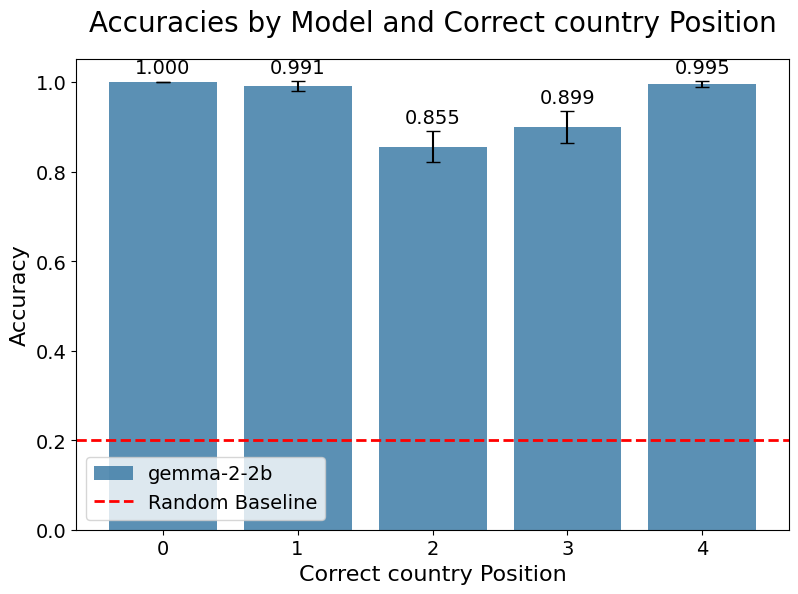

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Organize the data
template_name = "country"
baseline_accuracies2 = json.load(open(f'artifacts/baseline_accuracies_{template_name}_gemma.json', 'r'))

data_list = []
    
for model_id, question_orders in baseline_accuracies2.items():
    for question_order, accuracies in question_orders.items():
        data_list.append({
            'Model': model_id.split('/')[1],
            'Question Order': str(question_order),
            'Accuracy': np.mean(accuracies),
            'Std': np.std(accuracies)
        })

df = pd.DataFrame(data_list)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the grouped bar plot
ax = sns.barplot(
    data=df,
    x='Question Order',
    y='Accuracy',
    hue='Model',
    alpha=0.8  # Bar transparency
)

# Add error bars manually
for i, model in enumerate(df['Model'].unique()):
    model_data = df[df['Model'] == model]
    x = np.arange(len(model_data['Question Order']))
    # Adjust x positions for grouped bars
    x = x + (i - 0.5 * (len(df['Model'].unique()) - 1)) * 0.8/len(df['Model'].unique())
    
    plt.errorbar(
        x=x,
        y=model_data['Accuracy'],
        yerr=model_data['Std'],
        fmt='none',
        color='black',
        capsize=5,
        capthick=1,
        linewidth=1.5
    )
    
    # Add value labels manually
    for j, (acc, std) in enumerate(zip(model_data['Accuracy'], model_data['Std'])):
        plt.text(x[j], acc + std + 0.01, f'{acc:.3f}', 
                ha='center', va='bottom', fontsize=14)  # Increase font size

# Add random baseline as red constant line at 0.2
ax.axhline(y=0.2, color='red', linestyle='--', linewidth=2, label='Random Baseline')

# Customize the plot
plt.title(f'Accuracies by Model and Correct {template_name} Position', pad=20, fontsize=20)  # Increase title font size
plt.xlabel(f'Correct {template_name} Position', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Accuracy', fontsize=16)  # Increase y-axis label font size

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Increase legend font size
ax.legend(fontsize=14)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig(f'images/baseline_accuracies_{template_name}_gemma.png')

plt.show()

In [29]:
# Example usage
from dataset_utils import generate_dataset, process_dataset, print_processed_example
from generation import filter_correct
from tqdm import tqdm

num_samples = 100
total_length = 200
random_offset = True

baseline_accuracies = {}
model_id = "google/gemma-2-2b"
model = load_model(model_id)
model.tokenizer.pad_token = model.tokenizer.eos_token
selected_templates = ["nonbox_templates", 'box_templates']

for selected_template in selected_templates:
    baseline_accuracies[selected_template] = {}
    for base_question_order in range(5):
        baseline_accuracies[selected_template][base_question_order] = []
        for _ in tqdm(range(10)):
            base_entity_name = ["common_objects1"]

            # Generate dataset
            base_dataset = generate_dataset(
                num_samples=num_samples,
                selected_entity_categories=base_entity_name,
                sample_entities_randomly=True,
                sample_attributes_randomly=True,
                question_order=base_question_order,
                selected_template_categories=[selected_template],
                templates_file="data/templates_box.json",
                raw_dataset_path=None,
            )

            # Process and tokenize dataset
            base_dataset = process_dataset(
                base_dataset,
                model.tokenizer,
                ctx_length_with_pad=total_length,
                random_offset=random_offset,
                save_path=None,
            )

            _, base_accuracy = filter_correct(model, base_dataset)
            print(f"Base accuracy: {base_accuracy:.2f}")
            baseline_accuracies[selected_template][base_question_order].append(base_accuracy)

 10%|█         | 1/10 [00:03<00:31,  3.51s/it]

Base accuracy: 0.47


 20%|██        | 2/10 [00:07<00:28,  3.51s/it]

Base accuracy: 0.51


 30%|███       | 3/10 [00:10<00:24,  3.51s/it]

Base accuracy: 0.51


 40%|████      | 4/10 [00:14<00:21,  3.51s/it]

Base accuracy: 0.34


 50%|█████     | 5/10 [00:17<00:17,  3.50s/it]

Base accuracy: 0.45


 60%|██████    | 6/10 [00:21<00:14,  3.51s/it]

Base accuracy: 0.46


 70%|███████   | 7/10 [00:24<00:10,  3.51s/it]

Base accuracy: 0.40


 70%|███████   | 7/10 [00:27<00:11,  3.94s/it]


KeyboardInterrupt: 

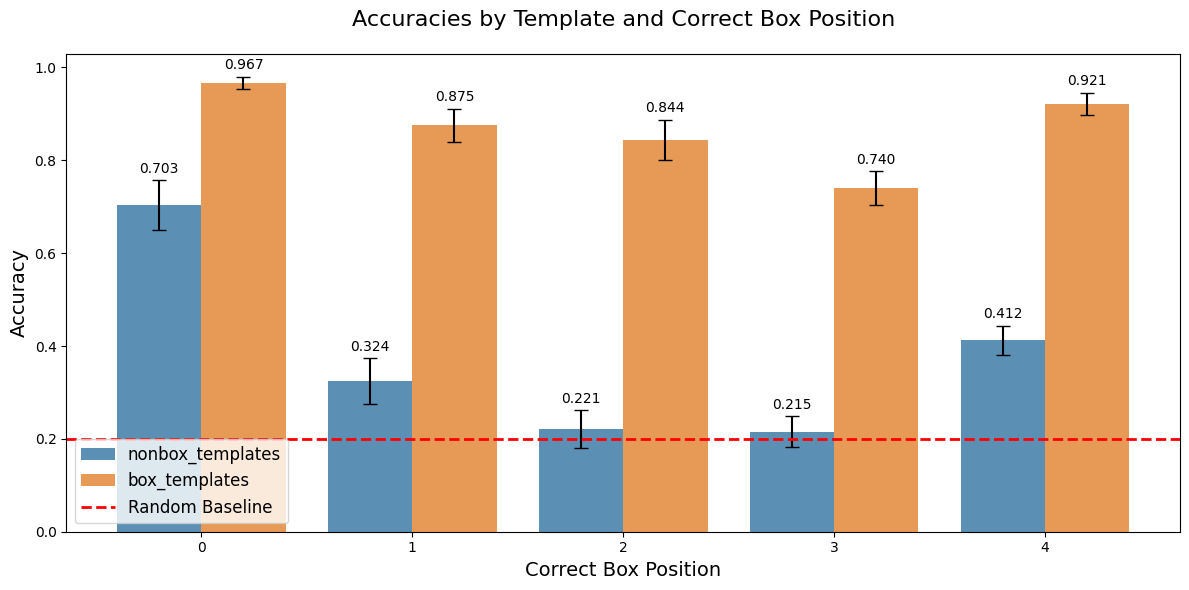

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Organize the data
# baseline_accuracies = json.load(open('baseline_accuracies2.json', 'r'))

data_list = []
    
for template, question_orders in baseline_accuracies.items():
    for question_order, accuracies in question_orders.items():
        data_list.append({
            'Template': template,
            'Question Order': str(question_order),
            'Accuracy': np.mean(accuracies),
            'Std': np.std(accuracies)
        })

df = pd.DataFrame(data_list)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the grouped bar plot
ax = sns.barplot(
    data=df,
    x='Question Order',
    y='Accuracy',
    hue='Template',
    alpha=0.8  # Bar transparency
)

# Add error bars manually
for i, Template in enumerate(df['Template'].unique()):
    Template_data = df[df['Template'] == Template]
    x = np.arange(len(Template_data['Question Order']))
    # Adjust x positions for grouped bars
    x = x + (i - 0.5 * (len(df['Template'].unique()) - 1)) * 0.8/len(df['Template'].unique())
    
    plt.errorbar(
        x=x,
        y=Template_data['Accuracy'],
        yerr=Template_data['Std'],
        fmt='none',
        color='black',
        capsize=5,
        capthick=1,
        linewidth=1.5
    )
    
    # Add value labels manually
    for j, (acc, std) in enumerate(zip(Template_data['Accuracy'], Template_data['Std'])):
        plt.text(x[j], acc + std + 0.01, f'{acc:.3f}', 
                ha='center', va='bottom')

# Add random baseline as red constant line at 0.2
ax.axhline(y=0.2, color='red', linestyle='--', linewidth=2, label='Random Baseline')

# Customize the plot
plt.title('Accuracies by Template and Correct Box Position', pad=20, fontsize=16)
plt.xlabel('Correct Box Position', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Increase legend font size
ax.legend(fontsize=12, loc='lower left')

plt.show()